In [2]:
import pandas as pd
import kit as erk
import statsmodels.api as sm
import numpy as np

%load_ext autoreload
%autoreload 2

### 1

In [20]:
fama_french = erk.get_fff_returns()
fama_french = fama_french['1991':'2018']

mkt_ex = fama_french[['Mkt-RF']]

fama_french.head()

,Mkt-RF,SMB,HML,RF
1991-01,0.0469,0.0379,-0.0184,0.0052
1991-02,0.0719,0.0395,-0.0054,0.0048
1991-03,0.0265,0.0389,-0.0123,0.0044
1991-04,-0.0028,0.0050,0.0142,0.0053
1991-05,0.0365,-0.0034,-0.0057,0.0047


In [57]:
ind = pd.read_csv("../data/ind49_m_vw_rets.csv", parse_dates=True, index_col=0) / 100
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')
ind.columns = ind.columns.str.strip()
ind = ind['1991':'2018']

ind = ind - fama_french[['RF']].values

ind.tail()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
2018-08,0.0699,0.0098,-0.0324,-0.0202,-0.0559,0.0722,0.0234,-0.0479,0.0238,0.0510,...,-0.0078,0.0275,0.0350,0.0895,0.0348,0.0261,0.0336,-0.0439,-0.0012,0.0317
2018-09,-0.0407,-0.0235,0.0295,0.0004,0.0522,0.0702,-0.0090,-0.0224,0.0092,0.0115,...,0.0174,0.0090,-0.0163,0.0046,0.0236,-0.0297,0.0101,-0.0507,-0.0355,0.0053
2018-10,-0.0216,0.0076,0.0099,-0.0176,0.0771,-0.1523,-0.1624,-0.0588,-0.0070,-0.1033,...,-0.1119,-0.0994,-0.0807,-0.1040,-0.0190,-0.0632,-0.0432,-0.1232,-0.0474,-0.0534
2018-11,-0.0375,0.0011,0.0666,0.0561,-0.0861,-0.0733,-0.0019,0.0357,0.0626,-0.0117,...,0.1003,0.0599,0.0300,0.0141,0.0598,0.0274,0.0414,0.0697,-0.0012,0.0337
2018-12,-0.1112,-0.1112,-0.0802,-0.0988,-0.1599,-0.1654,-0.0769,-0.1461,-0.0576,-0.0747,...,-0.1267,-0.1538,-0.1140,-0.0938,-0.0647,-0.1298,-0.1004,-0.1191,-0.0893,-0.0673


In [58]:
X = mkt_ex.copy(); X['Alpha'] = 1
X.head()

,Mkt-RF,Alpha
1991-01,0.0469,1
1991-02,0.0719,1
1991-03,0.0265,1
1991-04,-0.0028,1
1991-05,0.0365,1


In [63]:
lm = erk.regress( ind['1991': ][['Beer']], X['1991': ] )
round(lm.params[0], 2)

0.53

In [64]:
max_beta = 0; min_beta = float('inf')
max_ind_name = ''; min_ind_name = ''

for (ind_name, returns) in ind['1991':'1993'].items() :
    lm = erk.regress( returns, X['1991':'1993'] )
    beta = lm.params[0]

    if beta > max_beta : 
        max_beta = beta; max_ind_name = ind_name
    if min_beta > beta : 
        min_beta = beta; min_ind_name = ind_name

print( max_ind_name, min_ind_name)

Hlth Gold


In [65]:
X['SMB'] = fama_french[['SMB']]
X['HML'] = fama_french[['HML']]

X.head()

,Mkt-RF,Alpha,SMB,HML
1991-01,0.0469,1,0.0379,-0.0184
1991-02,0.0719,1,0.0395,-0.0054
1991-03,0.0265,1,0.0389,-0.0123
1991-04,-0.0028,1,0.0050,0.0142
1991-05,0.0365,1,-0.0034,-0.0057


In [66]:
max_smb = float('-inf'); min_smb = float('inf')
max_smb_name = ''; min_smb_name = ''

max_hml = float('-inf'); min_hml = float('inf')
max_hml_name = ''; min_hml_name = ''


for (ind_name, returns) in ind.items() :
    lm = erk.regress( returns, X )
    smb = lm.params[2]; hml = lm.params[3]

    if smb > max_smb : 
        max_smb = smb; max_smb_name = ind_name
    if min_smb > smb : 
        min_smb = smb; min_smb_name = ind_name

    if hml > max_hml : 
        max_hml = hml; max_hml_name = ind_name
    if min_hml > hml : 
        min_hml = hml; min_hml_name = ind_name

print( max_smb_name, min_smb_name) 
print( max_hml_name, min_hml_name) 

FabPr Beer
Txtls Softw


In [67]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Other   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     125.3
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           2.75e-54
Time:                        21:56:35   Log-Likelihood:                 587.78
No. Observations:                 336   AIC:                            -1168.
Df Residuals:                     332   BIC:                            -1152.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         1.0884      0.057     19.099      0.000       0.976       1.200
Alpha         -0.0064      0.002     -2.705      0.007      -0.011      -0.002
SMB           -0.0193      0.076     -0.254      0.800      -0.169       0.130
HML            0.2831      0.081      3.506      0.001       0.124       0.442
==============================================================================
Omnibus:                       22.528   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.194
Skew:                          -0.121   Prob(JB):                     2.10e-16
Kurtosis:                       5.258   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

In [3]:
df = {
    "Array_1": [30, 70, 100],
    "Array_2": [65.1, 49.50, 30.7]
}
 
data = pd.DataFrame(df)
data

sd = data.std()
sd

Array_1    35.118846
Array_2    17.224788
dtype: float64

In [4]:
np.outer(sd,sd)

array([[1233.33333333,  604.91468636],
       [ 604.91468636,  296.69333333]])

In [20]:
ind_rets = erk.get_ind_returns(weighting="vw", n_inds= 30)["1997":"2018"]
ind_mcap = erk.get_ind_market_caps(30, weights=False)["1997":"2018"]

In [28]:
ind_rets.head(3)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1997-01,0.0289,0.1136,0.0463,0.0359,0.0075,0.0643,0.0644,0.0955,0.0378,0.0550,...,0.0234,0.0576,0.1027,0.0121,0.0240,0.0018,0.0034,0.0161,0.0659,0.0704
1997-02,0.0279,0.0274,0.1247,-0.0026,0.0239,0.0287,0.0312,0.0094,0.0110,0.0221,...,0.0228,-0.0510,-0.0805,0.0480,-0.0106,-0.0089,0.0563,-0.0315,0.0393,-0.0453
1997-03,-0.0120,-0.0653,-0.1354,-0.0320,0.0071,-0.0606,-0.0566,-0.0740,-0.0216,-0.0284,...,-0.0760,-0.0567,-0.0522,-0.0446,-0.0018,-0.0657,-0.0055,0.0165,-0.0663,-0.0430


In [29]:
ind_mcap.head(3)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1997-01,205765.04,204260.49,109853.76,109044.12,83981.74,192417.12,49413.90,719447.82,210979.85,14234.88,...,493053.20,433536.90,777517.30,172630.93,127754.77,101221.26,364189.84,82617.52,1319438.10,102086.10
1997-02,210392.55,227457.09,114935.10,112880.18,84477.12,204637.32,52595.75,787324.56,218908.63,15009.72,...,503014.05,457588.62,856551.97,174653.97,130005.26,101294.80,362326.25,83939.68,1401478.14,109267.25
1997-03,215930.00,233561.16,129106.38,112140.30,86327.78,210193.92,54217.00,792713.16,219812.90,15319.18,...,512064.18,433679.40,786306.14,182458.44,128405.88,100261.70,381746.04,81237.20,1450970.40,104194.53


,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.077614,0.158685,-0.538531,5.317042,0.072485,0.106220,0.291838,-0.53298
CW,0.065196,0.151478,-0.556621,4.249894,0.071076,0.098531,0.225949,-0.51899


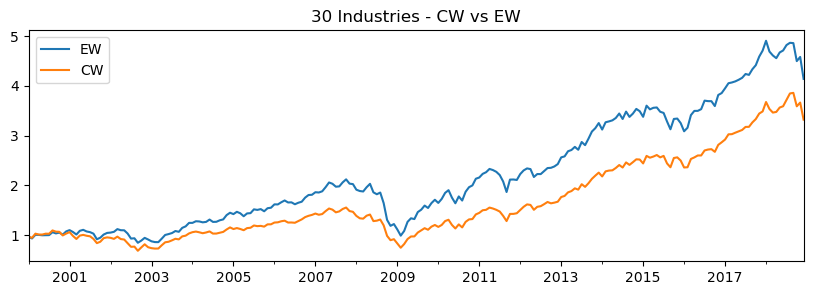

In [31]:
ew = erk.backtest_ws(ind_rets, estimation_window=36, weighting=erk.weight_ew)
cw = erk.backtest_ws(ind_rets, estimation_window=36, weighting=erk.weight_cw, cap_weights=ind_mcap)

bk_test = pd.DataFrame({"EW": ew, "CW": cw}); bk_test.dropna(inplace = True)

(1+bk_test).cumprod().plot(figsize=(10,3), title="30 Industries - CW vs EW")
erk.summary_stats(bk_test)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.077614,0.158685,-0.538531,5.317042,0.072485,0.106220,0.291838,-0.53298
CW,0.065196,0.151478,-0.556621,4.249894,0.071076,0.098531,0.225949,-0.51899


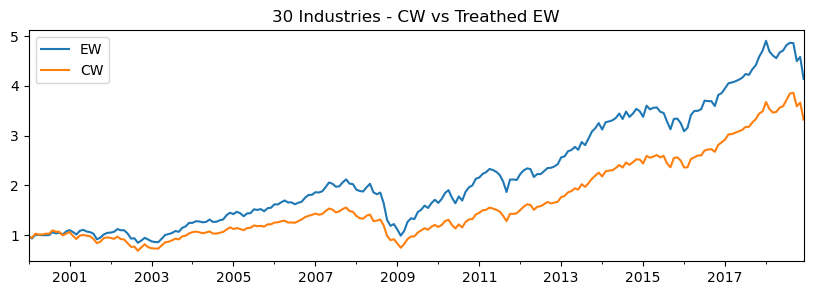

In [32]:
ew_th = erk.backtest_ws(ind_rets, estimation_window=36, weighting=erk.weight_ew, cap_weights=ind_mcap, max_cw_mult=2, microcap_threshold=0.01)

bk_test = pd.DataFrame({"EW": ew_th, "CW": cw}); bk_test.dropna(inplace = True)

(1+bk_test).cumprod().plot(figsize=(10,3), title="30 Industries - CW vs Treathed EW")
erk.summary_stats(bk_test)

In [35]:
trk_err = erk.tracking_error(cw, ew) * 100
trk_th_err = erk.tracking_error(cw, ew_th) *100

print( f'{trk_err:.2f} - {trk_th_err:.2f}' )

18.75 - 18.75


,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
SampleCov,0.066306,0.117410,-0.741085,4.469207,0.055456,0.080583,0.300817,-0.421289
ShrinkCov,0.068467,0.114572,-0.731299,4.264950,0.053884,0.077715,0.326638,-0.393410


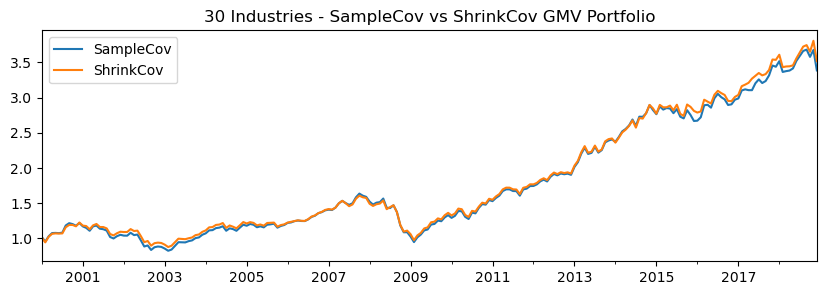

In [37]:
gmv_samplecov = erk.backtest_ws(ind_rets, estimation_window=36, weighting = erk.weight_gmv, cov_estimator = erk.sample_cov)
gmv_shrinkcov = erk.backtest_ws(ind_rets, estimation_window=36, weighting = erk.weight_gmv, cov_estimator = erk.shrinkage_cov, delta=0.25)

bk_test = pd.DataFrame({"SampleCov": gmv_samplecov, "ShrinkCov": gmv_shrinkcov}); bk_test.dropna(inplace = True)

(1+bk_test).cumprod().plot(figsize=(10,3), title="30 Industries - SampleCov vs ShrinkCov GMV Portfolio")
erk.summary_stats(bk_test)